Importing Packages

In [2]:
import os
import numpy as np
from PIL import Image

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt

Load in Dataset

In [3]:
# change to proper unity id
root = "/home/amzeplin/plant_village_dataset"

View Classes in Dataset

In [4]:
os.listdir(root)

['Cherry',
 'Potato',
 'Strawberry',
 'Apple',
 'Corn (Maize)',
 'Grape',
 'Bell Pepper',
 'Peach',
 'Tomato']

Folders in each class

In [5]:
tomato_class = os.path.join(root, "Tomato")
os.listdir(tomato_class)

['Val', 'Train', 'Test']

Classes in each folder 

In [6]:
tomato_class_train = os.path.join(tomato_class, "Train")
os.listdir(tomato_class_train)

['Early Blight',
 'Bacterial Spot',
 'Yellow Leaf Curl Virus',
 'Septoria Leaf Spot',
 'Healthy',
 'Late Blight']

Creating Train, Val, and Test Data Variables 

In [7]:
class PlantVillage(torch.utils.data.Dataset):
    def __init__(
        self,
        root: str,
        split: str,
        shuffle=False,
        transform=None,
        mask_val: str = "-0.5"
    ):
        self.root = root
        self.species = os.listdir(self.root)
        
        self.img_split = split
        self.transform = transform

        self.data = self.__load_files()


    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # get data
        img_file, species, disease_class = self.data[idx]

        img = Image.open(img_file)
        
        if self.transform is not None:
            img = self.transform(img)        

        return img, species + "_" + disease_class
    
    
    def __load_files(self):
        data = []

        for specie in self.species:
            dir = os.path.join(self.root, specie, self.img_split)
            
            for disease in os.listdir(dir):
                
                data.extend([(os.path.join(dir, disease, img), specie, disease) for img  in os.listdir(os.path.join(dir, disease))])

        return data

Vieweing Data Hunter

In [8]:
train_augmentations = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Resize(
                (224, 224), interpolation=transforms.InterpolationMode.NEAREST
            ),
            #transforms.RandomHorizontalFlip(),
            #transforms.RandomRotation(degrees=15, fill=-0.5)
        ],
    )

train_ds = PlantVillage(
            root=root,
            split="Train",
            transform=train_augmentations,
        )

val_ds = PlantVillage(
            root=root,
            split="Val",
            transform=train_augmentations,
        )

test_ds = PlantVillage(
            root=root,
            split="Test",
            transform=train_augmentations,
        )

train_loader = torch.utils.data.DataLoader(
    dataset=train_ds,
    batch_size=32,
    num_workers=0,
    drop_last=False,
    persistent_workers=False,
    shuffle=True,
    pin_memory=True,
)

val_loader = torch.utils.data.DataLoader(
    dataset=val_ds,
    batch_size=32,
    num_workers=0,
    drop_last=True,
    persistent_workers=False,
    shuffle=False,
    pin_memory=True,
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_ds,
    num_workers=0,
    batch_size=32,
    drop_last=True,
    persistent_workers=False,
    shuffle=False,
    pin_memory=True,
)

Viewing Data Samples

In [9]:
images, labels = next(iter(train_loader))
imgs = images[:4]
labs = labels[:4]

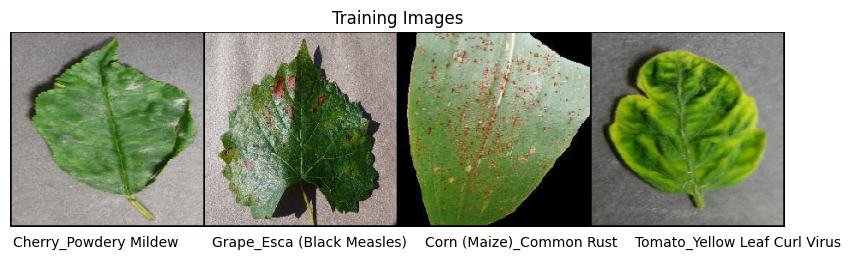

In [10]:
images_to_display = torchvision.utils.make_grid(imgs, nrow=4, normalize=True)

images_to_display = images_to_display.numpy().transpose((1, 2, 0))

plt.figure(figsize=(10, 5))
plt.imshow(images_to_display)
plt.axis('off')

for i in range(4):
    plt.text(i * 250 + 100, 250, f'{labs[i]}', color='black', backgroundcolor='white', fontsize=10, ha='center')
plt.title("Training Images")
plt.show()

Validation Data

In [11]:
images, labels = next(iter(val_loader))
imgs = images[:4]
labs = labels[:4]

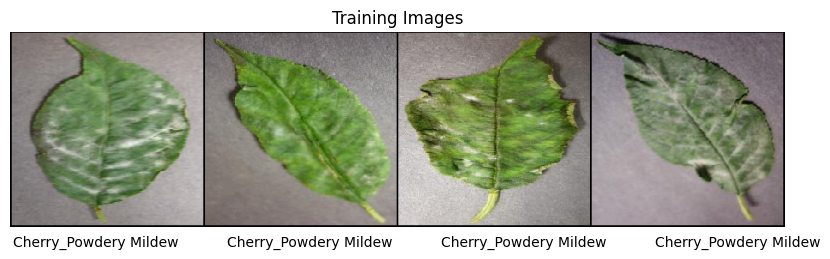

In [12]:
images_to_display = torchvision.utils.make_grid(imgs, nrow=4, normalize=True)

images_to_display = images_to_display.numpy().transpose((1, 2, 0))

plt.figure(figsize=(10, 5))
plt.imshow(images_to_display)
plt.axis('off')

for i in range(4):
    plt.text(i * 250 + 100, 250, f'{labs[i]}', color='black', backgroundcolor='white', fontsize=10, ha='center')
plt.title("Training Images")
plt.show()

Test Data

In [13]:
images, labels = next(iter(test_loader))
imgs = images[:4]
labs = labels[:4]

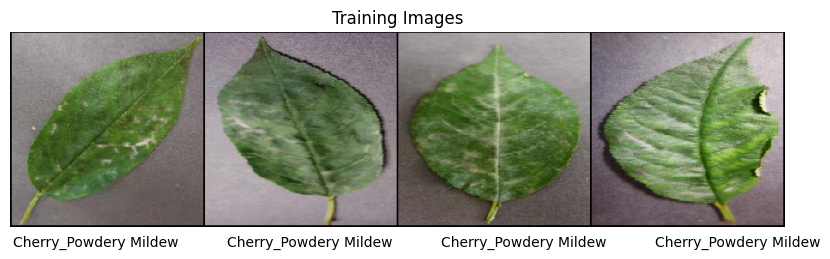

In [14]:
images_to_display = torchvision.utils.make_grid(imgs, nrow=4, normalize=True)

images_to_display = images_to_display.numpy().transpose((1, 2, 0))

plt.figure(figsize=(10, 5))
plt.imshow(images_to_display)
plt.axis('off')

for i in range(4):
    plt.text(i * 250 + 100, 250, f'{labs[i]}', color='black', backgroundcolor='white', fontsize=10, ha='center')
plt.title("Training Images")
plt.show()

Total species categories: 9

Species: Cherry
  - Val: 2 diseases
    - Powdery Mildew: 378 images
    - Healthy: 410 images
  - Train: 2 diseases
    - Powdery Mildew: 1683 images
    - Healthy: 1826 images
  - Test: 2 diseases
    - Powdery Mildew: 43 images
    - Healthy: 46 images

Species: Potato
  - Val: 3 diseases
    - Early Blight: 436 images
    - Healthy: 410 images
    - Late Blight: 436 images
  - Train: 3 diseases
    - Early Blight: 1939 images
    - Healthy: 1824 images
    - Late Blight: 1939 images
  - Test: 3 diseases
    - Early Blight: 49 images
    - Healthy: 46 images
    - Late Blight: 49 images

Species: Strawberry
  - Val: 2 diseases
    - Leaf Scorch: 399 images
    - Healthy: 410 images
  - Train: 2 diseases
    - Leaf Scorch: 1774 images
    - Healthy: 1824 images
  - Test: 2 diseases
    - Leaf Scorch: 45 images
    - Healthy: 46 images

Species: Apple
  - Val: 4 diseases
    - Black Rot: 447 images
    - Cedar Apple Rust: 396 images
    - Apple Scab: 453 i

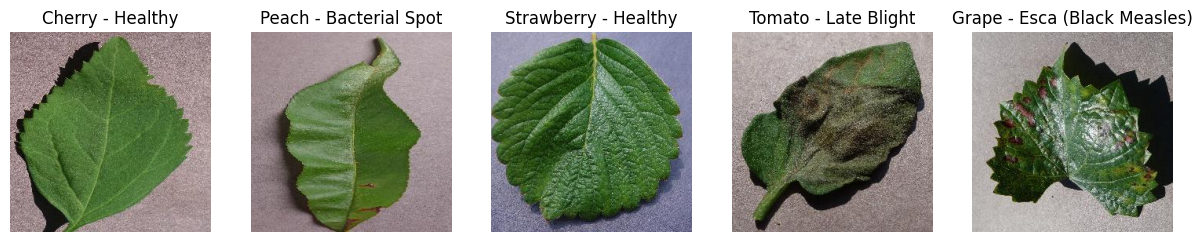

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import torchvision.transforms as transforms

# Define dataset path
root = "/home/amzeplin/plant_village_dataset"

# Function to check dataset structure
def explore_dataset_structure(root):
    species = os.listdir(root)
    print(f"Total species categories: {len(species)}")
    for specie in species:
        specie_path = os.path.join(root, specie)
        if os.path.isdir(specie_path):
            splits = os.listdir(specie_path)
            print(f"\nSpecies: {specie}")
            for split in splits:  # Train, Val, Test
                split_path = os.path.join(specie_path, split)
                if os.path.isdir(split_path):  
                    diseases = os.listdir(split_path)
                    print(f"  - {split}: {len(diseases)} diseases")
                    for disease in diseases:
                        disease_path = os.path.join(split_path, disease)
                        if os.path.isdir(disease_path):
                            img_count = len(os.listdir(disease_path))
                            print(f"    - {disease}: {img_count} images")

# Function to count images per class
def count_images(root):
    class_counts = Counter()
    for specie in os.listdir(root):
        specie_path = os.path.join(root, specie)
        if os.path.isdir(specie_path):
            for split in os.listdir(specie_path):  # Train, Val, Test
                split_path = os.path.join(specie_path, split)
                if os.path.isdir(split_path):
                    for disease in os.listdir(split_path):
                        disease_path = os.path.join(split_path, disease)
                        if os.path.isdir(disease_path):
                            class_counts[f"{specie}_{disease}"] += len(os.listdir(disease_path))
    
    print("\nImage count per class:")
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")
    return class_counts

# Function to visualize images correctly
def visualize_samples(root, num_samples=5):
    fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))
    
    species = os.listdir(root)
    selected_species = np.random.choice(species, num_samples, replace=False)
    
    for i, specie in enumerate(selected_species):
        specie_path = os.path.join(root, specie)
        if not os.path.isdir(specie_path): 
            continue

        splits = [s for s in os.listdir(specie_path) if os.path.isdir(os.path.join(specie_path, s))]
        if not splits:
            continue

        split = np.random.choice(splits)  # Randomly choose Train, Val, Test
        split_path = os.path.join(specie_path, split)

        diseases = [d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))]
        if not diseases:
            continue

        selected_disease = np.random.choice(diseases)
        disease_path = os.path.join(split_path, selected_disease)

        img_files = [f for f in os.listdir(disease_path) if os.path.isfile(os.path.join(disease_path, f))]
        if not img_files:
            continue

        img_file = np.random.choice(img_files)
        img = Image.open(os.path.join(disease_path, img_file))

        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f"{specie} - {selected_disease}")

    plt.show()

# Function to get dataset statistics
def dataset_statistics(class_counts):
    total_images = sum(class_counts.values())
    num_classes = len(class_counts)
    avg_per_class = total_images / num_classes if num_classes else 0

    print(f"\nDataset Statistics:")
    print(f" - Total images: {total_images}")
    print(f" - Number of classes (species + disease): {num_classes}")
    print(f" - Average images per class: {avg_per_class:.2f}")

# Run exploration
explore_dataset_structure(root)
class_counts = count_images(root)
dataset_statistics(class_counts)
visualize_samples(root, num_samples=5)


This shows each plant and breaks it down by train, validation, and testing set to show which diseases are in each one along with how many images are in each one to show exactly which diseases are with which species. This is helpful to see if there are some species/ diseases that have fewer images to see if we need augment them to include more so our dataset isn't imbalanced. 

Seeing the images used between train, validation, and test we can see if we have a strong dataset for training a model (training > validation > test)

We can see that tomatoes includes 6 diseases while other include 2-4 diseases which means that tomatoes will be more complex and could possibly need a seperate model since it could create model bias where the model might generalize well for tomato, but struggle with peach since it has fewer samples 



Trial 1

Defining Data transformers

In [16]:
import torchvision.transforms as transforms

# Define data transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize images to 224x224
    transforms.RandomHorizontalFlip(),  # Augment by flipping images
    transforms.RandomRotation(15),  # Augment by rotating images
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize([0.5], [0.5])  # Normalize pixel values
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


Creating Data Loaders

In [17]:
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image

# Define dataset root
root = "/home/amzeplin/plant_village_dataset"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Custom dataset class
class PlantVillageDataset(Dataset):
    def __init__(self, root, split, transform=None):
        self.root = root
        self.split = split  # "Train", "Val", or "Test"
        self.transform = transform
        self.data = []
        self.classes = []

        # Load all images and labels
        self._load_dataset()

    def _load_dataset(self):
        species = os.listdir(self.root)
        for specie in species:
            specie_path = os.path.join(self.root, specie)
            if not os.path.isdir(specie_path):
                continue  # Skip non-directory files

            split_path = os.path.join(specie_path, self.split)
            if not os.path.isdir(split_path):
                continue  # Skip if split folder doesn't exist

            for disease in os.listdir(split_path):
                disease_path = os.path.join(split_path, disease)
                if os.path.isdir(disease_path):
                    for img_file in os.listdir(disease_path):
                        img_path = os.path.join(disease_path, img_file)
                        if img_path.lower().endswith(('png', 'jpg', 'jpeg')):
                            self.data.append((img_path, f"{specie}_{disease}"))

        # Generate a label-to-index mapping
        unique_classes = sorted(set(label for _, label in self.data))
        self.class_to_idx = {label: idx for idx, label in enumerate(unique_classes)}
        self.classes = unique_classes

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert("RGB")
        label_idx = self.class_to_idx[label]

        if self.transform:
            image = self.transform(image)

        return image, label_idx

# Load datasets
train_dataset = PlantVillageDataset(root=root, split="Train", transform=transform)
val_dataset = PlantVillageDataset(root=root, split="Val", transform=transform)
test_dataset = PlantVillageDataset(root=root, split="Test", transform=transform)

# Create DataLoaders
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train samples: {len(train_dataset)}, Validation samples: {len(val_dataset)}, Test samples: {len(test_dataset)}")
print(f"Classes: {train_dataset.classes}")


Train samples: 53690, Validation samples: 12067, Test samples: 1354
Classes: ['Apple_Apple Scab', 'Apple_Black Rot', 'Apple_Cedar Apple Rust', 'Apple_Healthy', 'Bell Pepper_Bacterial Spot', 'Bell Pepper_Healthy', 'Cherry_Healthy', 'Cherry_Powdery Mildew', 'Corn (Maize)_Cercospora Leaf Spot', 'Corn (Maize)_Common Rust ', 'Corn (Maize)_Healthy', 'Corn (Maize)_Northern Leaf Blight', 'Grape_Black Rot', 'Grape_Esca (Black Measles)', 'Grape_Healthy', 'Grape_Leaf Blight', 'Peach_Bacterial Spot', 'Peach_Healthy', 'Potato_Early Blight', 'Potato_Healthy', 'Potato_Late Blight', 'Strawberry_Healthy', 'Strawberry_Leaf Scorch', 'Tomato_Bacterial Spot', 'Tomato_Early Blight', 'Tomato_Healthy', 'Tomato_Late Blight', 'Tomato_Septoria Leaf Spot', 'Tomato_Yellow Leaf Curl Virus']


Defining Data Transforms 

In [18]:
import torchvision.transforms as transforms

# Define data transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize images to 224x224
    transforms.RandomHorizontalFlip(),  # Augment by flipping images
    transforms.RandomRotation(15),  # Augment by rotating images
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize([0.5], [0.5])  # Normalize pixel values
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


In [19]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Modify the final layer to match the number of classes in your dataset
num_classes = len(train_dataset.classes)  # Get number of classes from dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print(f"Model loaded on {device}")


/home/amzeplin/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/amzeplin/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded on cuda


In [20]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=5):
    model.train()
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        
        accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")
    
    print("Training complete!")


In [26]:
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=8)


Epoch [1/8], Loss: 73.7003, Accuracy: 98.58%
Epoch [2/8], Loss: 67.0571, Accuracy: 98.69%
Epoch [3/8], Loss: 52.3033, Accuracy: 99.00%
Epoch [4/8], Loss: 48.5877, Accuracy: 99.06%
Epoch [5/8], Loss: 44.1289, Accuracy: 99.18%
Epoch [6/8], Loss: 46.4625, Accuracy: 99.20%
Epoch [7/8], Loss: 31.5076, Accuracy: 99.42%
Epoch [8/8], Loss: 40.8818, Accuracy: 99.25%
Training complete!


Right now we are learining to classify the plant diseases as our model gets better we see that we are becoming more accurate with less losses 